
# Linear Programming Lab

## Total: 40 points

In this lab, you will explore a useful extension of linear programming duality (covered in class
LP Day 1) called linear programming sensitivity analysis. Here, we aim to find:

- How does the solution change when the objective function changes?
- How does the solution change when the resource limits change?
- How does the solution change when a constraint is added to the problem?

One approach to these types of questions is solving lots of slightly different linear programming problems. This method would work, but it is inelegant and (for large problems) computationally expensive (but in most cases today, computation is cheap and computing solutions to many problems is a standard technique to study sensitivity in practice). However, there is a more elegant solution
that gives these answers just by examining the dual information provided by the Simplex Algorithm.

**Consider the following scenario:** An instrument company makes trombones and trumpets. A trombone requires 40 square inches of metal sheet and a trumpet requires 30 square inches of metal. Metal costs $1 per square inch and 40,000 square inches are available. It takes two hours of skilled labor to make a novice quality trombone or a novice quality trumpet. Three more hours of skilled labor will turn a novice quality trombone into a professional trombone. Two more hours of skilled labor will turn a novice quality trumpet into a professional trumpet. There are 6000 hours of skilled labor available. Assume that you do not need to pay for labor. Assume that you can sell fractional trombones and trumpets. The market selling prices and production costs are given in the following table:

| Product    | Market Price | Cost (metal $1/sq.in.) |
| -------- | ------- | ------- |
| Novice Trombone | $70 | $40 |
| Professional Trombone | $140 | $40 |
| Novice Trumpet | $60 | $30 |
| Professional Trumpet | $110 | $30 |

---


# Problem 1: Formulate the LP (5 points)
## 1a: Set up the LP (3 points)

Write an objective function that maximizes profits (market price - production
costs) and all constraints.

### Instructions
- Write the equations, using LaTeX, between the $$ tags. Then convert the LP problem into code by referring to this documentation: [PuLP Guide](https://realpython.com/linear-programming-python/#using-pulp)

### Solution:
Objective Function: $$ Z = (70 - 40)x_1 + (140 - 40)x_2 + (60 - 30)x_3 + (110 - 30)x_4  $$
$$ Z = 30x_1 + 100x_2 + 30x_3 + 80x_4 $$
Constraints:
- Metal usage constraint: $$ 40x_1 + 40x_2 + 30x_3 + 30x_4 \leq 40,000 $$
- Labor usage constraint: $$ 2x_1 + 5x_2 + 2x_3 + 4x_4 \leq 6000$$
- Non-negativity constraint: $$ x_1, x_2, x_3, x_4 \geq 0 $$

In [38]:
from pulp import LpMaximize, LpProblem, LpVariable, LpStatus, PULP_CBC_CMD
import copy

# Define the problem
main_model = LpProblem(name="instrument-production", sense=LpMaximize) # (please do not rename this variable as it's used later in the notebook)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet

# Objective function
# TODO: Add objective function
obj_func = 30 * x1 + 100 * x2 + 30 * x3 + 80 * x4
main_model += obj_func

# Constraints
# 1. Total metal sheet used
# TODO: Add constraint
main_model += (40*x1 + 40*x2 + 30*x3 + 30*x4<=40000, "metal_constraint")

# 2. Total skilled labor hours used
# TODO: Add constraint
main_model += (2*x1 + 5*x2 + 2*x3 + 4*x4<=6000, "labor_constraint")


# 3. Non-negativity constraints (already enforced by lowBound=0 in variable definition)

In [39]:
main_model

instrument-production:
MAXIMIZE
30*x1 + 100*x2 + 30*x3 + 80*x4 + 0
SUBJECT TO
metal_constraint: 40 x1 + 40 x2 + 30 x3 + 30 x4 <= 40000

labor_constraint: 2 x1 + 5 x2 + 2 x3 + 4 x4 <= 6000

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous

## 1b) Solve the LP Computationally (1 point)
Use the model we created above to find the optimal profit. Run the code block below to solve the problem.

### Solution:

Optimal Profit: $106666.67

In [40]:
# Solve the problem
main_model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sallylee/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/7p/56509rkj7kvbtmfr9nmjhvy00000gn/T/f147d4dd75ab4a1e9d7f32a5045a53c5-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/7p/56509rkj7kvbtmfr9nmjhvy00000gn/T/f147d4dd75ab4a1e9d7f32a5045a53c5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 20 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 2 rows, 4 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 4 (0) columns and 8 (0) elements
0  Obj -0 Dual inf 270 (4)
0  Obj -0 Dual inf 270 (4)
1  Obj 106666.67
Optimal - objective value 106666.67
Optimal objective 106666.6667 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (W

1

## 1c.) What is the optimal number of each instrument to produce? (1 point)
Run the code cell below to find the optimal value for each variable in the model. Fill in the table below.
### Solution:

| Variable    | Value |
| -------- | ------- |
| x1 | 0 |
| x2 | 0 |
| x3 | 0 |
| x4 | 1333.3333 |

In [41]:
for var in main_model.variables():
    print(var.name, var.value())

x1 0.0
x2 0.0
x3 0.0
x4 1333.3333


# Problem 2: Sensitivity of Novice Quality Trumpets (5 points)

## 2a) (2 points)

What would happen if the market price of novice quality trumpets went up? In other words, how much can the market price coefficient in the objective function change without causing the optimal basis to change? This is also called “allowable increase.” You are provided a helper function to find the allowable increase. Try messing with the parameters and looking at the source code in the `helpers.py` file to understand how it works.

### Solution:

If the market price for the novice quality trumpets go up, at first it does not change the optimal basis, making not much of a difference. However as the market price goes up to 110, making the coefficient to 80, it becomes more profittable to sell more novice quality trumpets than the professional one. Therefore the allowable increase for x3 is 50. 

In [42]:
from helpers import find_allowable_increase
# Run the helper to find the allowable increase for x3
allowable_increase = find_allowable_increase(base_model=main_model, var_name="x3", base_coef=30, step=5)

print(f"The allowable increase for x3 is: {allowable_increase}")

Iteration 1: Coefficient of x3: 30, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 2: Coefficient of x3: 35, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 3: Coefficient of x3: 40, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 4: Coefficient of x3: 45, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 5: Coefficient of x3: 50, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 6: Coefficient of x3: 55, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
---------------------------------------

/Users/sallylee/anaconda3/lib/python3.10/site-packages/pulp/pulp.py:1650: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


## 2b) (2 points)
Would novice trumpets be more profitable than professional trumpets to produce if novice trumpets sold for the same amount as professional quality trumpets?

### Solution:
No, the total profit would be the same. Although it seems as if it would be more profittable to sell a novice trumpets than a professional one if they are sold for the same price, given the model outcome changed, the objective value is the same before and after setting the  price for the novice trumpets as high as the professional trumpets. From this, we can tell that the limit comes from the amount of metal not the hours of labor needed.

## 2c) (1 point)
What would change if the price went down?

### Solution:
Lowering the price for the novice trumpet would not change the objective value nor the solution. Since the professional trumpets are already the most profittable to produce, the model makes sure that we are only producing the professional trumpet. If the price for the novice trumpet goes down, it means it is becoming less profittable and there is no additional reason to consider producing it. 

# Problem 3: Sensitivity of Novice Quality Trombones (5 points)

## 3a) (2 points)

What would happen if the market price of novice quality trombones went up? In other words, what is the “allowable increase” in the market price of novice quality trombones?


### Solution:
The allowable increase for x1 is: 77

In [43]:
from helpers import find_allowable_increase

# setting verbose to False since we take smaller steps for this variable and don't want to print every iteration
allowable_increase = find_allowable_increase(base_model=main_model, var_name="x1", base_coef=30, step=1, max_iter=100, verbose=False)

print(f"The allowable increase for x1 is: {allowable_increase}")

Optimal basis changed at coefficient 107.

The allowable increase for x1 is: 77


## 3b) (3 points)
Would they be profitable to produce if they sold for the same amount as professional quality trombones? What would make them profitable to produce (intuitive explanation is expected, not specific numbers)?

### Solution:

No, the total profit would be the same. Although it seems as if it would be more profitable to sell a novice trombone than a professional one if they are sold for the same price, given the model outcome changed, the objective value is the same before and after setting the  price for the novice trombone as high as the professional trombone. From this, we can tell that the limit comes from the amount of metal not the hours of labor needed.

# Problem 4: Sensitivity of Professional Quality Trumpets (2 points)

What would happen to the optimal solution if the price of professional quality trumpets fell to $100? If there is a change, what would the new production plan and optimal profit be?

Provide your analysis and corresponding code below.

### Solution:

The optimal profit is now 100000 dollars and selling the professional trombone is the most profittable.

In [44]:
low_trumpet_model = LpProblem(name="instrument-production", sense=LpMaximize)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet

# TODO: Re-define Objective function
low_trumpet_model += 30 * x1 + 100 * x2 + 30 * x3 + 70 * x4

# Constraints
low_trumpet_model += 40 * x1 + 40 * x2 + 30 * x3 + 30 * x4 <= 40000, "Metal Sheet Constraint"
low_trumpet_model += 2 * x1 + 5 * x2 + 2 * x3 + 4 * x4 <= 6000, "Skilled Labor Constraint"

# Solve the low_trumpet_model
low_trumpet_model.solve(PULP_CBC_CMD(msg=0))

# Display results
print("Sensitivity Analysis for Professional Quality Trumpets (Price = $100):")
print(f"Objective value (Profit): {low_trumpet_model.objective.value()}")
for var in low_trumpet_model.variables():
    print(f"{var.name}: {var.value()}")

Sensitivity Analysis for Professional Quality Trumpets (Price = $100):
Objective value (Profit): 100000.0
x1: 0.0
x2: 1000.0
x3: 0.0
x4: 0.0


# Problem 5: Sensitivity of Metal Resources (8 points)

## 5a) (4 points)
How do production plans change when metal supplies change? At which point does metal stop being a limiting resource and how do you know?

**HINT**: To find out how the production plans change when metal supplies change, you can use a **guess-and-check approach**. 

1. Start with the current RHS of the "Metal Sheet Constraint" (40,000 square inches).
2. Gradually increase or decrease the RHS (e.g., by 1,000 or 5,000 units at a time).
3. For each adjustment:
   - Re-run to solve the problem and record the production plan (values of x_1, x_2, x_3, x_4) and the total profit.
   - Compare the new solution to the original solution (at RHS = 40,000).
4. Stop increasing when you notice the production plan has stopped changing. The last RHS value before the variable values stop changing is the **RHS Tolerance Upper Bound**.
5. Stop decreasing when the model becomes infeasible. The last RHS value before the model becomes infeasible is the **RHS Tolerance Lower Bound**.

### Solution:

When the metal sheet constraint was increase to 41000 the total profit increased to $109333.34 by producing more x4. The profit kept increasing till the metal sheet constriant became 45000 when the slack for both labor and metal sheet became zero and the profit became 120000 which is 13334 dollars more than the original solution. Therefore, the RHS Tolerance Upper Bound is 45000 

When I decreased the metal sheet constraint the total profit started decreasing and there were more labor slacks. However, there wasn't a tolerance lower bounds

In [45]:
main_model = copy.deepcopy(main_model)

# Print the results
print("Initial Solution:")
print(f"Total Profit: ${main_model.objective.value():.2f}")
print("Production Plan:")
for var in main_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in main_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

# ---------------------------------------------
# Guess-and-Check Setup
# ---------------------------------------------
# Change the RHS of the "Metal Sheet Constraint" below and re-run this block of code.
main_model.constraints["metal_constraint"].changeRHS(00)  # TODO: Change this value

print("---------------------------------------------")
print("After Adjusting Metal Sheet Constraint:")

# Re-solve the problem
main_model.solve(PULP_CBC_CMD(msg=0))
print(f"Model Solution Status: {LpStatus[main_model.status]}")

# Print updated results
print(f"Total Profit: ${main_model.objective.value():.2f}")
print("Production Plan:")
for var in main_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in main_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

Initial Solution:
Total Profit: $106666.66
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1333.3333

Slack Values for Constraints:
  metal_constraint: RHS = -40000, slack = -0.0
  labor_constraint: RHS = -6000, slack = 666.6666999999998
---------------------------------------------
After Adjusting Metal Sheet Constraint:
Model Solution Status: Optimal
Total Profit: $0.00
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 0.0

Slack Values for Constraints:
  metal_constraint: RHS = 0, slack = -0.0
  labor_constraint: RHS = -6000, slack = 6000.0


## 5b) (4 points)
**What is the shadow price of metal?**  
1. Explain the concept of a shadow price in the context of the "Metal Sheet Constraint" and how it impacts the objective function (profit).  
2. Using the shadow price, calculate how much the profit is expected to change if the metal supplies increase by 500 square inches.  
3. Solve the problem again with the increased metal supplies and verify the expected profit change and the new production plan.

Use the following formula for profit change:  
$$ \Delta profit = \Delta \text{metal supplies quantity} \cdot dual_{metal} $$

---

### HINT

1. **What is the Shadow Price?**  
   The shadow price (also called the dual value) of a constraint tells you how much the objective value (profit) will change per unit increase in the RHS of the constraint, as long as the change is within the **RHS tolerance interval**.

2. **How to Find the Shadow Price?**  
   - Solve the LP model with the original RHS.
   - Check the **dual value** (`constraint.pi`) of the "Metal Sheet Constraint" in the solver's output. This is the shadow price.

3. **Useful Methods**
   - Use `shadow_model.constraints["Metal_Sheet_Constraint"].changeRHS(new_rhs)` to update the RHS of the "Metal Sheet Constraint"

### Solution:

1. The shadow price shows the optimal profit we can have if we have more metal sheet available. So, it shows how much more profit we can gain per extra square inch of metal.
2. the new profit is 108000 whereas the original profit was 106666.67. It increased by 1333.33. Which makes sense because the shadow price is 2.667 and if we multiply this by 500 we get 1333.33.
3. when the metal supply is increased even more by another 500, the new profit is 109333.336. We can see that the optimal profit increased even more with the increased amount of metal supply. 

In [46]:
shadow_model = copy.deepcopy(main_model)

# TODO: Solve the shadow price problem
shadow_price = shadow_model.constraints["metal_constraint"].pi
print(shadow_price)
# TODO: Update RHS
new_rhs = 40000 + 1000
shadow_model.constraints["metal_constraint"].changeRHS(new_rhs)
shadow_model.solve()

# Display the new results
print("New Results with Increased Metal Supply:")
print(f"New Profit: {shadow_model.objective.value()}")
print("Production Plan:")
for var in shadow_model.variables():
    print(f"  {var.name}: {var.value()}")

2.6666667
New Results with Increased Metal Supply:
New Profit: 109333.336
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1366.6667


# Problem 6: Sensitivity of Labor Resources (5 points)

## 6a) (1 point)
How much labor is unused?

HINT: What is the slack?

From the original solution, the unused labor hour is 666.6666999999998, which is the slack of labor. 

In [47]:
# TODO
main_model.constraints["labor_constraint"].slack

6000.0

## 6b) (2 points)
How much would you be willing to pay an additional laborer?

### Solution:

I won't be willing to pay for additional laborer because we already have so much labor hours remaining unused as a slack. 

## 6c) (2 points)
Suppose that industrial regulation complicate the process so it takes an additional hour of labor to turn a novice quality instrument into a professional quality instrument. How and why does that change affect the optimal production plan and profit?

### Solution:

Now our optimal solution is producing 1333.333 professional trumpets to get the maximum profit. If we add extra hours of labor to this, that will be 1333.333 additional hours of labor. However, we only have 666.6666999999998 hours of slack labor remaining. Therefore, we cannot produce as much professional trumpets as we used to with a given labor. Therefore, our optimal profit will reduce and we will have to change the product that we are producing given the new labor constraint to maximize our overall profit. Now, producing the professional 1000 trumbones is more profitable than producing 1200 professional trumpets which are all bounded by the new labor constraint. 

In [48]:
added_labor_model = copy.deepcopy(main_model)

added_labor_model+= 2*x1 + 6*x2 + 2*x3 + 5*x4<=6000, "new_labor_constraint"

for var in added_labor_model.variables():
    print(var.name, var.value())

x1 0.0
x1 0.0
x2 0.0
x2 1000.0
x3 0.0
x3 0.0
x4 0.0
x4 0.0


# Problem 7: Sensitivity of New Constraint (5 points)

## 7a) (4 points)
The owner of the company comes up with a design for a beautiful hand-crafted tuba. Each tuba requires 250 hours of labor (6.25 weeks of full time work) and uses 50 square inches of metal. If the
company can sell tubas for $200, would it be worthwhile to produce? Use:
$$ \text{(marginal cost of metal)}_{tuba} = \text{(metal used)}_{tuba} \cdot dual_{metal} $$

Discuss how looking at the shadow prices of metal and labor can help
you intuit whether diverting metal resources to tuba production is a good idea. Check your intuition with the solver.

### Solution:

I think it will slightly increase the optimal profit since we have too much slack labor hours currently and tuba uses a lot of labor hours while brining more profit. Although I don't think this will change the overall solution in that it mostly produces professional trumpets because too much labor is needed to produce just one tuba so it would be bounded by the labor hours available. In current situation only 24 tubas can be produced which will give us the total profit of $4800 which is far less than $106666.67. So, instead of replacing every professional trumpets, it will produce a bit less of professional trumpets and produce some tuba instead. 

In [57]:
from pulp import LpMaximize, LpProblem, LpVariable, value

# Define the problem
tuba_model = LpProblem(name="instrument-production", sense=LpMaximize)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet
x5 = LpVariable(name="x5", lowBound=0)  # Tubas

# TODO: Define the problem and analyze the shadow prices
tuba_model += 30 * x1 + 100 * x2 + 30 * x3 + 80 * x4 + 200 * x5, "Profit"

metal_constraint = 40 * x1 + 40 * x2 + 30 * x3 + 30 * x4 + 50*x5 <= 40000
labor_constraint = 2 * x1 + 5 * x2 + 2 * x3 + 4 * x4 + 250 *x5 <= 6000
tuba_model += metal_constraint, "metal_constraint"
tuba_model += labor_constraint, "labor_constraint"

tuba_model.solve()
for var in tuba_model.variables():
    print(var.name, var.value())

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sallylee/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/7p/56509rkj7kvbtmfr9nmjhvy00000gn/T/653c802d98ff48cf8d9c81c54b414d83-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/7p/56509rkj7kvbtmfr9nmjhvy00000gn/T/653c802d98ff48cf8d9c81c54b414d83-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 23 RHS
At line 26 BOUNDS
At line 27 ENDATA
Problem MODEL has 2 rows, 5 columns and 10 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 5 (0) columns and 10 (0) elements
0  Obj -0 Dual inf 962.92749 (5)
0  Obj -0 Dual inf 962.92749 (5)
2  Obj 106849.32
Optimal - objective value 106849.32
Optimal objective 106849.3151 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):  

## 7b) (1 point)
Is it profitable if tubas sell for $150? Why?

### Solution:

It is still profitable because it is still almost twice more expensive than the professional trumpets while using less than twice of the metal to produce and it effectively uses up the unused labors. 

# Problem 8: Making Sense of the Dual Problem (5 points)

## 8a) (3 points)
Set up the original problem’s corresponding dual LP. Write an objective function that maximizes profits (market price - production costs) and all dual constraints.

In [68]:
from pulp import LpMinimize, LpProblem, LpVariable

# Define the dual problem
dual_model = LpProblem(name="dual-instrument-production", sense=LpMinimize)

# TODO: Define the dual problem
u = LpVariable("Metal_Sheet_Price", lowBound=0, cat='Continuous')
v = LpVariable("Labor_Price", lowBound=0, cat='Continuous')

# Objective Function (Minimize Metal and Labor Cost)
dual_model += 40000 * u + 6000 * v, "Minimize_Cost"

# Constraints
dual_model += 40 * u + 2 * v >= 30, "Novice_Trombone_Constraint"
dual_model += 40 * u + 5 * v >= 100, "Professional_Trombone_Constraint"
dual_model += 30 * u + 2 * v >= 30, "Novice_Trumpet_Constraint"
dual_model += 30 * u + 4 * v >= 80, "Professional_Trumpet_Constraint"

# # Solve Dual Model
dual_model.solve()

# Display Dual Results
print("Dual Results")
print(f"Dual Objective Value: {value(dual_model.objective)}")
print(f"Metal Sheet Price: {u.varValue}")
print(f"Labor Price: {v.varValue}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sallylee/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/7p/56509rkj7kvbtmfr9nmjhvy00000gn/T/98c754ecddb541009a492b057b74b695-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/7p/56509rkj7kvbtmfr9nmjhvy00000gn/T/98c754ecddb541009a492b057b74b695-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 20 RHS
At line 25 BOUNDS
At line 26 ENDATA
Problem MODEL has 4 rows, 2 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 4 (0) rows, 2 (0) columns and 8 (0) elements
0  Obj 0 Primal inf 6.9166663 (4)
1  Obj 106666.67
Optimal - objective value 106666.67
Optimal objective 106666.6667 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       

## 8b) (1 point)
Run the code block below to solve the problem. What is the optimal profit? Give a plot of the constraints (you can use this [example](https://github.com/hakeemrehman/Python-PuLP-/blob/master/LP%20Using%20PuLP%20and%20Graphical%20Sol..ipynb) for guidance).

In [61]:
# Solve the dual problem
dual_model.solve(PULP_CBC_CMD(msg=0))

# Display the results
print("Dual Problem Results:")
print(f"Optimal Value (Total Resource Value): {dual_model.objective.value()}")

Dual Problem Results:
Optimal Value (Total Resource Value): 106666.66799999999


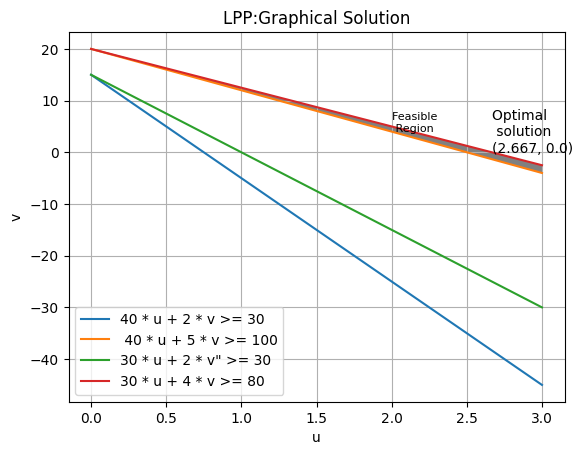

In [82]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the optimal solution
x = np.arange(0, 4)
plt.plot(x, 15 - 20 * x, label = '40 * u + 2 * v >= 30')
plt.plot(x, 20 - 8 * x, label= ' 40 * u + 5 * v >= 100')
plt.plot(x, 15 - 15 * x, label = '30 * u + 2 * v" >= 30')
plt.plot(x, 20 - 7.5 * x, label = "30 * u + 4 * v >= 80")


# plt.plot(x, 2 - 2/3*x, '--')

# # Define the boundaries of the feasible area in the plot
x = [0, 3, 3, 0]
y = [20, -2.5, -4, 20]
plt.fill(x, y, 'grey')

plt.text(2, 4, 'Feasible \n Region', size = '8')
plt.annotate('Optimal \n solution\n(2.667, 0.0)', xy = (2.667, 0.0))

plt.xlabel("u")
plt.ylabel("v")
plt.title('LPP:Graphical Solution')
# plt.axis([0, 3, -6, 6])
plt.grid(True)
plt.legend()
plt.show()

## 8c) (1 point)
Say something about the relationship between dual variables and slackness in the primal and dual problem.

### Solution:

when the primal constraint has slack, the corresponding dual variable is zero, and vice versa This means that a non-zero dual variable indicates a "tight" primal constraint (no slack) at the optimal solution. 